In [1]:
!pip install visualkeras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import np_utils
import visualkeras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import *
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Activation, MaxPool2D, Dropout
# Deep Learning Libraries
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, LearningRateScheduler
from keras.utils import to_categorical

     |████████████████████████████████| 798kB 5.2MB/s 


4423680/4422102 [==============================] - 0s 0us/step


((60000, 28, 28, 1), (10000, 28, 28, 1))

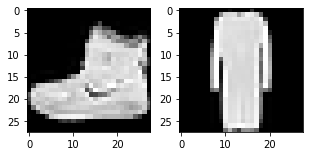

In [2]:
from keras.datasets import fashion_mnist
(features_train,labels_train), (features_test, labels_test) = fashion_mnist.load_data()
i = 0
plt.figure(figsize=(5, 5))
plt.subplot(221), plt.imshow(features_train[i], cmap='gray')

plt.subplot(222), plt.imshow(features_train[i+25], cmap='gray')

features_train, features_test = features_train.reshape(60000, 28, 28, 1), features_test.reshape(10000,28,28,1)

features_train.shape, features_test.shape

In [3]:
classes = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
classes_u5 = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat']
classes_o5 = ['Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
def image_augmentation(matrix, skew_degree, x_zoom, y_zoom):

    X_transformed = list()
    
    for row in matrix:
        row_transformed = apply_affine_transform(row, shear=20, zx=1.5, zy=1.5)

        X_transformed.append(row_transformed)
        
    return X_transformed

In [5]:
X_transformed = image_augmentation(features_train, 20, 1.5, 1.5)    
len(X_transformed)
X_transformed = np.array(X_transformed)
X_transformed.shape

(60000, 28, 28, 1)

(120000, 28, 28, 1)

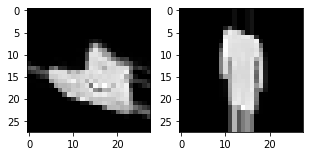

In [6]:
i = 0
plt.figure(figsize=(5, 5))
plt.subplot(221), plt.imshow(X_transformed[i,:,:,0], cmap='gray')
plt.subplot(222), plt.imshow(X_transformed[i+25,:,:,0], cmap='gray')
features_train = np.concatenate([features_train, X_transformed], axis=0)
features_train.shape

In [7]:
features_train.shape
labels_train = np.array(labels_train)
labels_train = np.concatenate([labels_train, labels_train], axis=0)

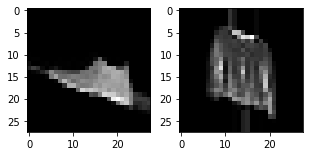

In [8]:
X_test_transformed = image_augmentation(features_test, 20, 1.5, 1.5)    
len(X_test_transformed)
X_test_transformed = np.array(X_test_transformed)
X_test_transformed.shape
i = 0
plt.figure(figsize=(5, 5))
plt.subplot(221), plt.imshow(X_test_transformed[i,:,:,0], cmap='gray')
plt.subplot(222), plt.imshow(X_test_transformed[i+25,:,:,0], cmap='gray')
features_test = np.concatenate([features_test, X_test_transformed], axis=0)
features_test.shape
labels_test = np.array(labels_test)
labels_test = np.concatenate([labels_test, labels_test], axis=0)


In [9]:
features_train.shape

(120000, 28, 28, 1)

In [10]:
u5_features_train = []
u5_labels_train = []
o5_features_train = []
o5_labels_train = []
u5_features_test = []
u5_labels_test = []
o5_features_test = []
o5_labels_test = []
for i in range(len(labels_train)):
    if labels_train[i] < 5 :
        u5_features_train.append(features_train[i] / 255)
        u5_labels_train.append(labels_train[i])
    else:
        o5_features_train.append(features_train[i] / 255)
        o5_labels_train.append(labels_train[i])
        
for i in range(len(labels_test)):
    if labels_test[i] < 5 :
        u5_features_test.append(features_test[i] / 255)
        u5_labels_test.append(labels_test[i])
    else:
        o5_features_test.append(features_test[i] / 255)
        o5_labels_test.append(labels_test[i])
for i in range(len(o5_labels_train)):
  o5_labels_train[i] = o5_labels_train[i] -5
for i in range(len(o5_labels_test)):
  o5_labels_test[i] = o5_labels_test[i] - 5 

In [11]:
o5_labels_train = np_utils.to_categorical(np.asarray(o5_labels_train)).astype(np.int32)
o5_labels_test = np_utils.to_categorical(np.asarray(o5_labels_test)).astype(np.int32)
u5_labels_train = np_utils.to_categorical(np.asarray(u5_labels_train)).astype(np.int32)
u5_labels_test = np_utils.to_categorical(np.asarray(u5_labels_test)).astype(np.int32)
o5_features_train = np.array(o5_features_train).astype(np.float32)
o5_features_test = np.array(o5_features_test).astype(np.float32)
u5_features_train = np.array(u5_features_train).astype(np.float32)

u5_features_test = np.array(u5_features_test).astype(np.float32)

In [12]:
o5_labels_train.shape

(60000, 5)

                                                  CREATE SIMPLE CNN MODEL & VISUALIZE

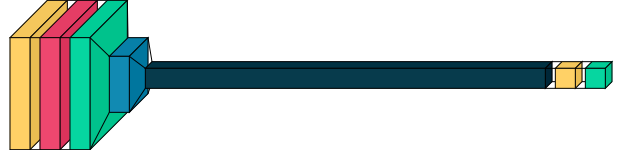

In [ ]:
from tensorflow.python.keras.layers import Input , Dense , Conv2D , Activation , Add,ReLU,MaxPool2D,Flatten,Dropout,BatchNormalization
from tensorflow.python.keras.models import Model
input = Input(shape=[28, 28, 1])
x= Conv2D(64, (3, 3), strides=1, padding='same')(input)
x = Activation('relu')(x)
x = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')(x)
x = Flatten()(x)
x = Dense(5)(x)
x = Activation('softmax')(x)
model = Model(inputs = input, outputs =x)

visualkeras.layered_view(model).show() # display using your system viewer
visualkeras.layered_view(model, to_file='output.png') # write to disk
visualkeras.layered_view(model, to_file='output.png').show() # write and show

visualkeras.layered_view(model)

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
activation_2 (Activation)    (None, 28, 28, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 62725     
_________________________________________________________________
activation_3 (Activation)    (None, 5)                 0   

In [ ]:
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from keras.optimizers import Adam ,RMSprop
import os 

# optimizer = RMSprop(lr=0.0001, rho=0.95, epsilon=1e-08, decay=0.0)
# epochs = 1
Learning_rate = 0.001
#decay= 5 * Learning_rate / epochs
optimizer = Adam(lr=Learning_rate)
#optimizer = Adam(lr=Learning_rate, decay= 3 * Learning_rate / epochs)
# optimizer = RMSprop(lr=Learning_rate, rho=0.9, epsilon=1e-08, decay= 0)


model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#               loss='sparse_categorical_crossentropy',

# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00000000000000000000000000000000000000000005)
# batch_size = 64
batch_size = 64
# Max value lr_min = 0.000125
checkpoint_path = "/content/drive/MyDrive/SimpleDNN/u5FAS"
checkpoint_dir = os.path.dirname(checkpoint_path)
# checkpoint = ModelCheckpoint("best_weights.hdf5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,monitor='val_accuracy',mode='max',
                                                               save_best_only=True)

# model.load_weights("training_1/cp.ckpt") 
# # Optimizer
# optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999 )
# # Compiling the model
# model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

# model.summary()

In [ ]:
def appendHist(h1, h2):
    if h1 == {}:
        return h2
    else:
        dest = {}
        for key, value in h1.items():
            dest[key] = value + h2[key]
        return dest

In [ ]:
history = model.fit(x=u5_features_train, y = Y, epochs = 40, validation_split = 0.10, shuffle = True,
                     batch_size = batch_size, verbose = 1, steps_per_epoch= u5_features_train.shape[0] // batch_size,callbacks=[checkpoint,learning_rate_reduction])
model.save("/content/drive/MyDrive/SimpleDNN/u5FAS/shaved_model.pb") # saving the model

np.save('/content/drive/MyDrive/SimpleDNN/u5FAS/history1.npy',history.history)

Visualizations

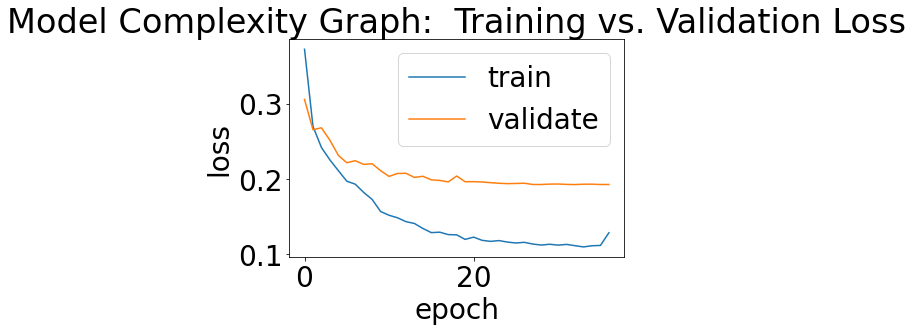

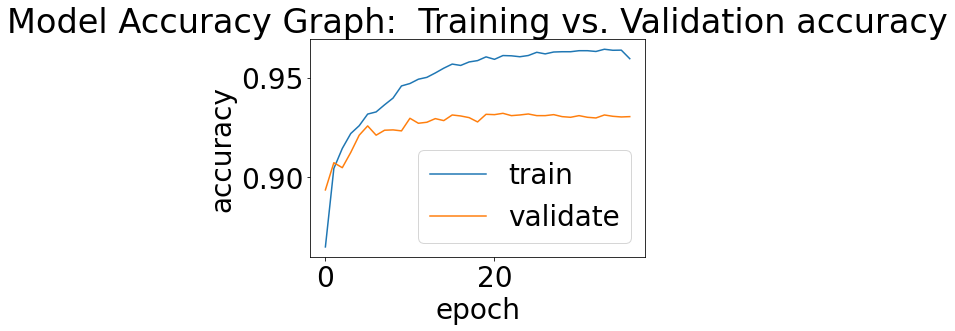

In [ ]:
history1 = np.load('/content/drive/MyDrive/SimpleDNN/u5FAS/history1.npy', allow_pickle=True).item()
plt.figure(1)
plt.plot(history1['loss'])
plt.plot(history1['val_loss'])
plt.title('Model Complexity Graph:  Training vs. Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper right')
plt.show()
plt.figure(2)
plt.plot(history1['accuracy'])
plt.plot(history1['val_accuracy'])
plt.title('Model Accuracy Graph:  Training vs. Validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='lower right')
plt.show()

In [ ]:
test0 = np.array([np.where(r==1)[0][0] for r in u5_labels_test])
print(test0)

[2 1 1 ... 1 1 1]


In [ ]:
score = model.evaluate(u5_features_test, test0, verbose = 1) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.2128 - accuracy: 0.9295
Test loss: 0.21275529265403748
Test accuracy: 0.9294999837875366


Confusion Matrix

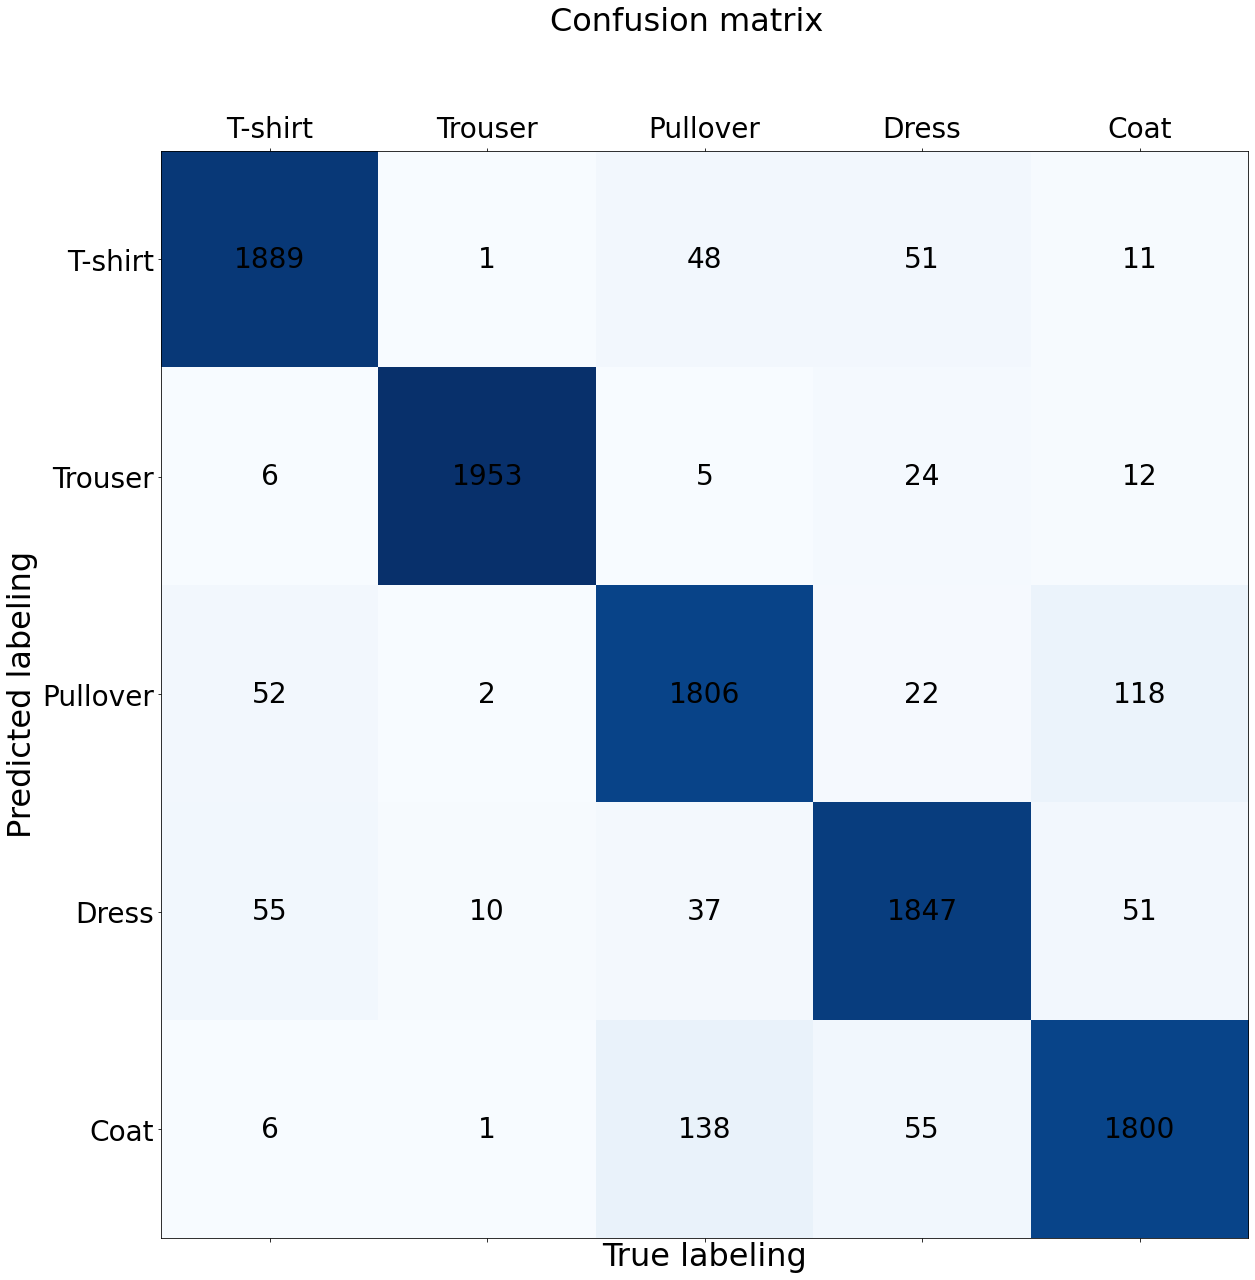

In [ ]:
model = tf.keras.models.load_model("/content/drive/MyDrive/SimpleDNN/u5FAS/shavedmodel.pb")
from sklearn.metrics import confusion_matrix

y_vecs = model.predict(u5_features_test)
y_pred = np.argmax(y_vecs, axis=1)
y_true = test0
cm = confusion_matrix(test0, y_pred)
# print(cm)

# plt.imshow(cm, cmap = 'ocean')
# plt.colorbar

min_val, max_val = 0, 15

# intersection_matrix = np.random.randint(0, 10, size=(max_val, max_val))
fig, ax = plt.subplots(figsize=(20,20))
ax.matshow(cm, cmap=plt.cm.Blues)
# ax.matshow(cm, cmap=plt.cm.magma_r)
ax.xaxis.set_ticklabels(classes_u5); ax.yaxis.set_ticklabels(classes_u5);

for i in range(5):
    for j in range(5):
        c = cm[j,i]
        ax.text(i, j, str(c), va='center', ha='center')


plt.xticks(range(5))
plt.yticks(range(5))
plt.suptitle('Confusion matrix',size = 32)
plt.xlabel('True labeling',size = 32)
plt.ylabel('Predicted labeling',size = 32)
plt.rcParams.update({'font.size': 28})

In [ ]:
model = tf.keras.models.load_model("/content/drive/MyDrive/SimpleDNN/u5FAS/shavedmodel.pb")
for layer in model.layers[:5]:
    layer.trainable =False
    
for layer in model.layers:
    print(layer.trainable)

False
False
False
False
False
True
True


In [ ]:
Y1 = np.array([np.where(r==1)[0][0] for r in o5_labels_train])

In [ ]:
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from keras.optimizers import Adam ,RMSprop
import os 

# optimizer = RMSprop(lr=0.0001, rho=0.95, epsilon=1e-08, decay=0.0)
# epochs = 1
Learning_rate = 0.001
#decay= 5 * Learning_rate / epochs
optimizer = Adam(lr=Learning_rate)
#optimizer = Adam(lr=Learning_rate, decay= 3 * Learning_rate / epochs)
# optimizer = RMSprop(lr=Learning_rate, rho=0.9, epsilon=1e-08, decay= 0)


model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#               loss='sparse_categorical_crossentropy',

# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00000000000000000000000000000000000000000005)
# batch_size = 64
batch_size = 64
# Max value lr_min = 0.000125
checkpoint_path = "/content/drive/MyDrive/SimpleDNN/o5FAS"
checkpoint_dir = os.path.dirname(checkpoint_path)
# checkpoint = ModelCheckpoint("best_weights.hdf5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,monitor='val_accuracy',mode='max',
                                                               save_best_only=True)

# model.load_weights("training_1/cp.ckpt") 
# # Optimizer
# optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999 )
# # Compiling the model
# model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

# model.summary()

In [ ]:
history = model.fit(x=o5_features_train, y = Y1, epochs = 40, validation_split = 0.10, shuffle = True,
                     batch_size = batch_size, verbose = 1, steps_per_epoch= u5_features_train.shape[0] // batch_size,callbacks=[checkpoint,learning_rate_reduction])
model.save("/content/drive/MyDrive/SimpleDNN/o5FAS/savemodel") # saving the model

np.save('/content/drive/MyDrive/SimpleDNN/o5FAS/history1.npy',history.history)

Epoch 1/40
937/937 [==============================] - 7s 7ms/step - loss: 0.8262 - accuracy: 0.7980 - val_loss: 0.1755 - val_accuracy: 0.9432
INFO:tensorflow:Assets written to: /content/drive/MyDrive/SimpleDNN/o5FAS/assets
Epoch 2/40
937/937 [==============================] - 6s 7ms/step - loss: 0.1488 - accuracy: 0.9552 - val_loss: 0.1381 - val_accuracy: 0.9567
INFO:tensorflow:Assets written to: /content/drive/MyDrive/SimpleDNN/o5FAS/assets
Epoch 3/40
937/937 [==============================] - 6s 6ms/step - loss: 0.1180 - accuracy: 0.9634 - val_loss: 0.1238 - val_accuracy: 0.9567
Epoch 4/40
937/937 [==============================] - 6s 6ms/step - loss: 0.0957 - accuracy: 0.9685 - val_loss: 0.1103 - val_accuracy: 0.9645
INFO:tensorflow:Assets written to: /content/drive/MyDrive/SimpleDNN/o5FAS/assets
Epoch 5/40
937/937 [==============================] - 6s 6ms/step - loss: 0.0812 - accuracy: 0.9717 - val_loss: 0.1064 - val_accuracy: 0.9668
INFO:tensorflow:Assets written to: /content/dri

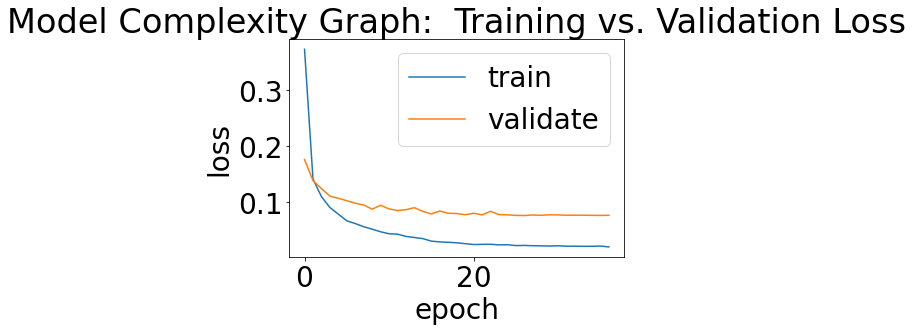

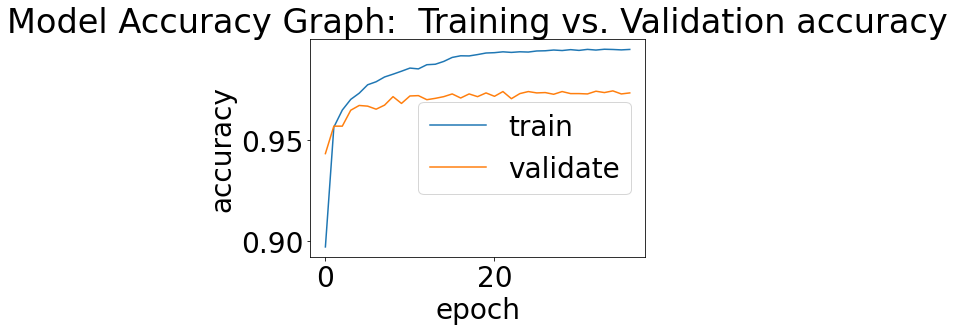

In [ ]:
history1 = np.load('/content/drive/MyDrive/SimpleDNN/o5FAS/history1.npy', allow_pickle=True).item()
plt.figure(1)
plt.plot(history1['loss'])
plt.plot(history1['val_loss'])
plt.title('Model Complexity Graph:  Training vs. Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper right')
plt.show()
plt.figure(2)
plt.plot(history1['accuracy'])
plt.plot(history1['val_accuracy'])
plt.title('Model Accuracy Graph:  Training vs. Validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='center right')
plt.show()

In [ ]:
Y = np.array([np.where(r==1)[0][0] for r in o5_labels_test])

In [ ]:
score = model.evaluate(o5_features_test, Y, verbose = 1) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0811 - accuracy: 0.9766
Test loss: 0.08112503588199615
Test accuracy: 0.9765999913215637


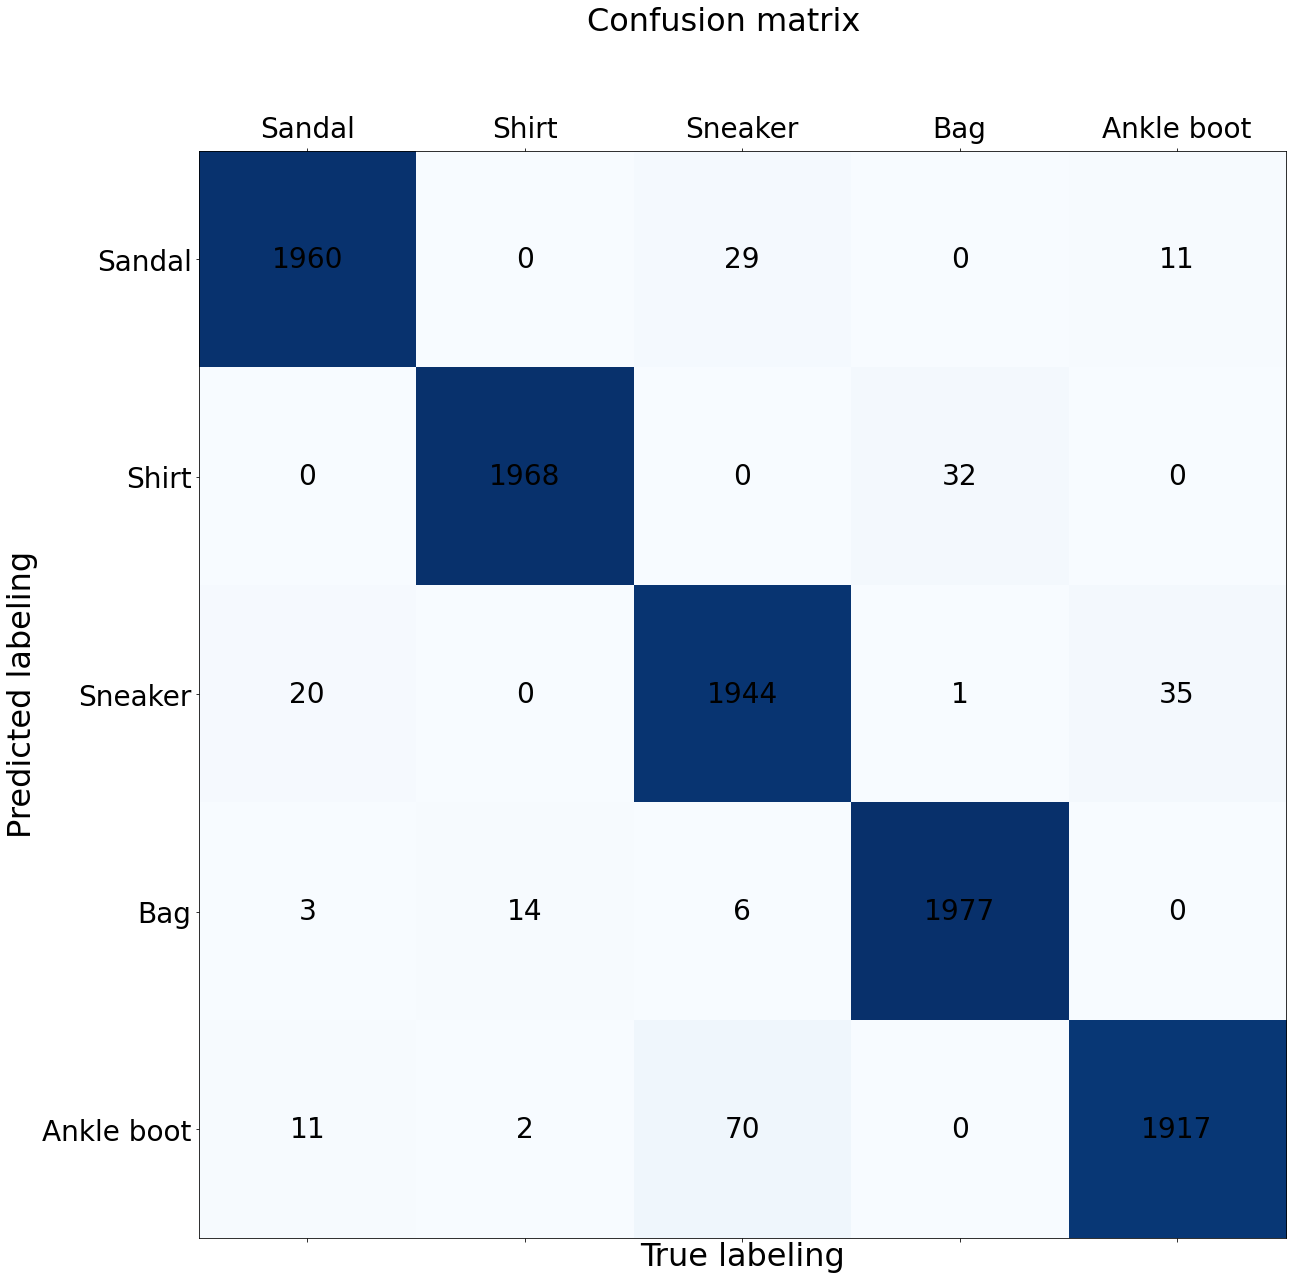

In [ ]:
from sklearn.metrics import confusion_matrix

y_vecs = model.predict(o5_features_test)
y_pred = np.argmax(y_vecs, axis=1)
y_true = test0
cm = confusion_matrix(Y, y_pred)
# print(cm)

# plt.imshow(cm, cmap = 'ocean')
# plt.colorbar

min_val, max_val = 0, 15

# intersection_matrix = np.random.randint(0, 10, size=(max_val, max_val))
fig, ax = plt.subplots(figsize=(20,20))
ax.matshow(cm, cmap=plt.cm.Blues)
# ax.matshow(cm, cmap=plt.cm.magma_r)
ax.xaxis.set_ticklabels(classes_o5); ax.yaxis.set_ticklabels(classes_o5);

for i in range(5):
    for j in range(5):
        c = cm[j,i]
        ax.text(i, j, str(c), va='center', ha='center')


plt.xticks(range(5))
plt.yticks(range(5))
plt.suptitle('Confusion matrix',size = 32)
plt.xlabel('True labeling',size = 32)
plt.ylabel('Predicted labeling',size = 32)
plt.rcParams.update({'font.size': 28})

TRANSFER LEARNING THROUGH WHOLE DATASET from 5 last labels 

In [ ]:
for layer in model.layers[:5]:
    layer.trainable =False
from keras.models import Model

modelall= Model(inputs=model.input, outputs=model.layers[-3].output)

In [ ]:
x=modelall.output
x = Dense(10)(x)
x = Activation('softmax')(x)
modelall =  Model(inputs = modelall.input, outputs =x)
modelall.summary()

Model: "model_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
activation_2 (Activation)    (None, 28, 28, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                125450    
_________________________________________________________________
activation_9 (Activation)    (None, 10)                0  

In [ ]:
for layer in modelall.layers:
    print(layer.trainable)

False
False
False
False
False
True
True


In [ ]:
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from keras.optimizers import Adam ,RMSprop
import os 

# optimizer = RMSprop(lr=0.0001, rho=0.95, epsilon=1e-08, decay=0.0)
# epochs = 1
Learning_rate = 0.001
#decay= 5 * Learning_rate / epochs
optimizer = Adam(lr=Learning_rate)
#optimizer = Adam(lr=Learning_rate, decay= 3 * Learning_rate / epochs)
# optimizer = RMSprop(lr=Learning_rate, rho=0.9, epsilon=1e-08, decay= 0)


modelall.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#               loss='sparse_categorical_crossentropy',

# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00000000000000000000000000000000000000000005)
# batch_size = 64
batch_size = 64
# Max value lr_min = 0.000125
checkpoint_path = "/content/drive/MyDrive/SimpleDNN/all1FAS"
checkpoint_dir = os.path.dirname(checkpoint_path)
# checkpoint = ModelCheckpoint("best_weights.hdf5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,monitor='val_accuracy',mode='max',
                                                               save_best_only=True)

# model.load_weights("training_1/cp.ckpt") 
# # Optimizer
# optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999 )
# # Compiling the model
# model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

# model.summary()

In [ ]:
history = modelall.fit(x=features_train, y = labels_train, epochs = 60, validation_split = 0.10, shuffle = True,
                     batch_size = batch_size, verbose = 1, steps_per_epoch= u5_features_train.shape[0] // batch_size,callbacks=[checkpoint,learning_rate_reduction])
modelall.save("/content/drive/MyDrive/SimpleDNN/all1FAS/shavemodel/") # saving the model
np.save('/content/drive/MyDrive/SimpleDNN/all1FAS/history1.npy',history.history)

Epoch 1/60
937/937 [==============================] - 7s 7ms/step - loss: 19.6692 - accuracy: 0.7687 - val_loss: 16.0281 - val_accuracy: 0.8037
INFO:tensorflow:Assets written to: /content/drive/MyDrive/SimpleDNN/all1FAS/assets
Epoch 2/60
937/937 [==============================] - 7s 7ms/step - loss: 17.5033 - accuracy: 0.8404 - val_loss: 14.1889 - val_accuracy: 0.8380
INFO:tensorflow:Assets written to: /content/drive/MyDrive/SimpleDNN/all1FAS/assets
Epoch 3/60
937/937 [==============================] - 6s 7ms/step - loss: 15.6619 - accuracy: 0.8563 - val_loss: 21.7525 - val_accuracy: 0.8174
Epoch 4/60
937/937 [==============================] - 7s 7ms/step - loss: 16.7405 - accuracy: 0.8604 - val_loss: 16.8598 - val_accuracy: 0.8512
INFO:tensorflow:Assets written to: /content/drive/MyDrive/SimpleDNN/all1FAS/assets
Epoch 5/60
937/937 [==============================] - 7s 7ms/step - loss: 16.1365 - accuracy: 0.8690 - val_loss: 13.1080 - val_accuracy: 0.8700
INFO:tensorflow:Assets written 

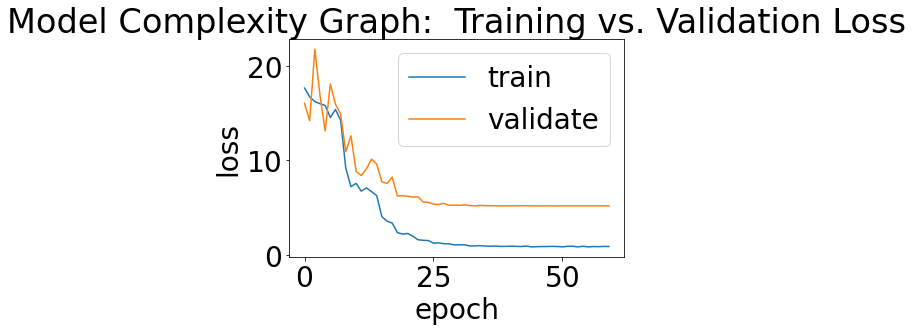

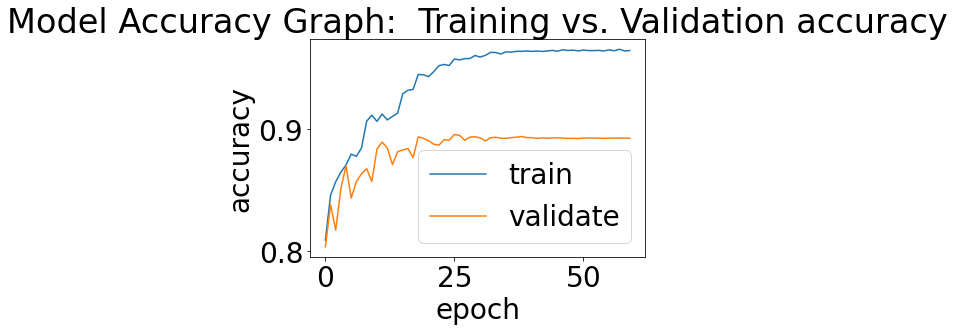

In [ ]:
history1 = np.load("/content/drive/MyDrive/SimpleDNN/all1FAS/history1.npy",allow_pickle=True).item()
plt.figure(1)
plt.plot(history1['loss'])
plt.plot(history1['val_loss'])
plt.title('Model Complexity Graph:  Training vs. Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper right')
plt.show()
plt.figure(2)
plt.plot(history1['accuracy'])
plt.plot(history1['val_accuracy'])
plt.title('Model Accuracy Graph:  Training vs. Validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='lower right')
plt.show()

In [15]:
modelall = tf.keras.models.load_model("/content/drive/MyDrive/SimpleDNN/all2FAS/shavemodel")
score = modelall.evaluate(features_test, labels_test, verbose = 1) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

625/625 [==============================] - 2s 3ms/step - loss: 7.7201 - accuracy: 0.8939
Test loss: 7.720094680786133
Test accuracy: 0.8938999772071838


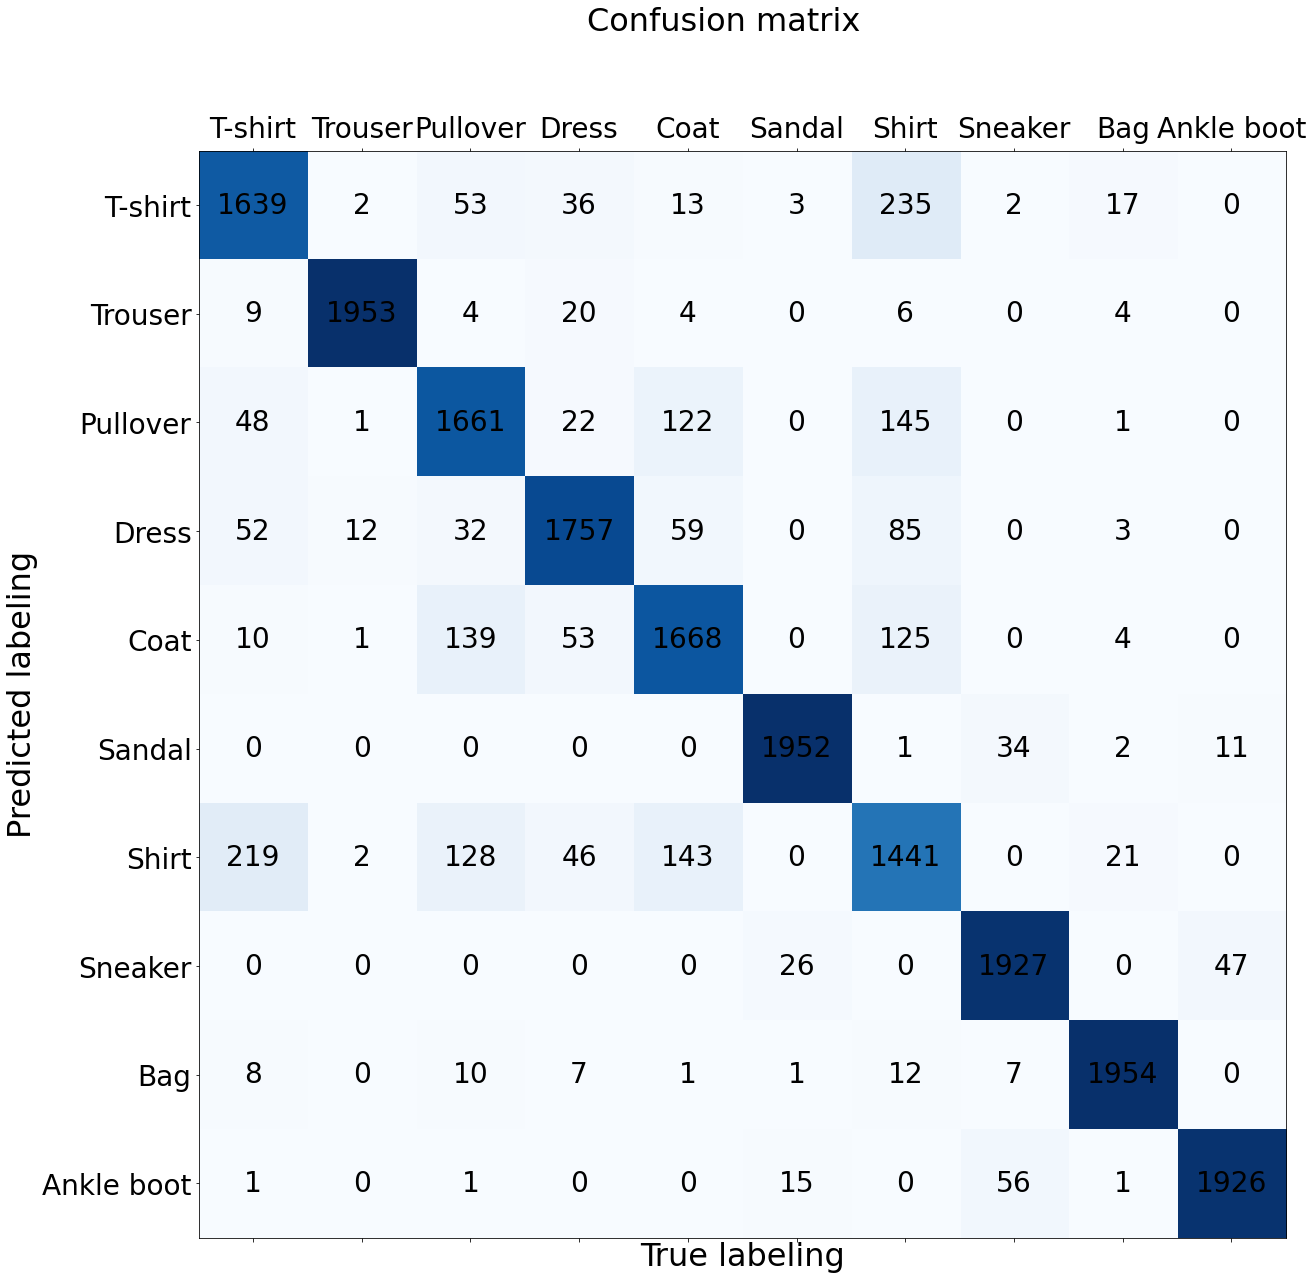

In [ ]:
from sklearn.metrics import confusion_matrix

y_vecs = modelall.predict(features_test)
y_pred = np.argmax(y_vecs, axis=1)
y_true = labels_test
cm = confusion_matrix(y_true, y_pred)
# print(cm)

# plt.imshow(cm, cmap = 'ocean')
# plt.colorbar

min_val, max_val = 0, 15

# intersection_matrix = np.random.randint(0, 10, size=(max_val, max_val))
fig, ax = plt.subplots(figsize=(20,20))
ax.matshow(cm, cmap=plt.cm.Blues)
# ax.matshow(cm, cmap=plt.cm.magma_r)
ax.xaxis.set_ticklabels(classes); ax.yaxis.set_ticklabels(classes);

for i in range(10):
    for j in range(10):
        c = cm[j,i]
        ax.text(i, j, str(c), va='center', ha='center')


plt.xticks(range(10))
plt.yticks(range(10))
plt.suptitle('Confusion matrix',size = 32)
plt.xlabel('True labeling',size = 32)
plt.ylabel('Predicted labeling',size = 32)
plt.rcParams.update({'font.size': 28})

Τranfer learning from 5 last label model

In [ ]:
model = tf.keras.models.load_model("/content/drive/MyDrive/SimpleDNN/u5FAS/shavedmodel.pb")
for layer in model.layers[:5]:
    layer.trainable =False
from keras.models import Model

model= Model(inputs=model.input, outputs=model.layers[-3].output)


In [ ]:
x=model.output
x = Dense(10)(x)
x = Activation('softmax')(x)
inp = model.input
modelall2 =  Model(inputs = inp, outputs =x)
modelall2.summary()

Model: "model_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
activation_2 (Activation)    (None, 28, 28, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                125450    
_________________________________________________________________
activation_10 (Activation)   (None, 10)                0  

In [ ]:
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from keras.optimizers import Adam ,RMSprop
import os 

# optimizer = RMSprop(lr=0.0001, rho=0.95, epsilon=1e-08, decay=0.0)
# epochs = 1
Learning_rate = 0.001
#decay= 5 * Learning_rate / epochs
optimizer = Adam(lr=Learning_rate)
#optimizer = Adam(lr=Learning_rate, decay= 3 * Learning_rate / epochs)
# optimizer = RMSprop(lr=Learning_rate, rho=0.9, epsilon=1e-08, decay= 0)


modelall2.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#               loss='sparse_categorical_crossentropy',

# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00000000000000000000000000000000000000000005)
# batch_size = 64
batch_size = 64
# Max value lr_min = 0.000125
checkpoint_path = "/content/drive/MyDrive/SimpleDNN/all2FAS/"
checkpoint_dir = os.path.dirname(checkpoint_path)
# checkpoint = ModelCheckpoint("best_weights.hdf5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,monitor='val_accuracy',mode='max',
                                                               save_best_only=True)

# model.load_weights("training_1/cp.ckpt") 
# # Optimizer
# optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999 )
# # Compiling the model
# model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

# model.summary()

In [ ]:
history = modelall2.fit(x=features_train, y = labels_train, epochs = 80, validation_split = 0.10, shuffle = True,
                     batch_size = batch_size, verbose = 1, steps_per_epoch= u5_features_train.shape[0] // batch_size,callbacks=[checkpoint,learning_rate_reduction])
modelall.save("/content/drive/MyDrive/SimpleDNN/all2FAS/shavemodel/") # saving the model
np.save('/content/drive/MyDrive/SimpleDNN/all2FAS/history1.npy',history.history)

Epoch 1/80
937/937 [==============================] - 7s 7ms/step - loss: 19.5514 - accuracy: 0.7644 - val_loss: 19.0751 - val_accuracy: 0.7994
INFO:tensorflow:Assets written to: /content/drive/MyDrive/SimpleDNN/all2FAS/assets
Epoch 2/80
937/937 [==============================] - 7s 7ms/step - loss: 17.3615 - accuracy: 0.8402 - val_loss: 10.9074 - val_accuracy: 0.8618
INFO:tensorflow:Assets written to: /content/drive/MyDrive/SimpleDNN/all2FAS/assets
Epoch 3/80
937/937 [==============================] - 7s 7ms/step - loss: 14.8877 - accuracy: 0.8591 - val_loss: 12.4092 - val_accuracy: 0.8546
Epoch 4/80
937/937 [==============================] - 7s 7ms/step - loss: 16.8825 - accuracy: 0.8595 - val_loss: 16.1387 - val_accuracy: 0.8581
Epoch 5/80
937/937 [==============================] - 7s 8ms/step - loss: 15.6115 - accuracy: 0.8684 - val_loss: 16.3433 - val_accuracy: 0.8471

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 6/80
937/937 [=============

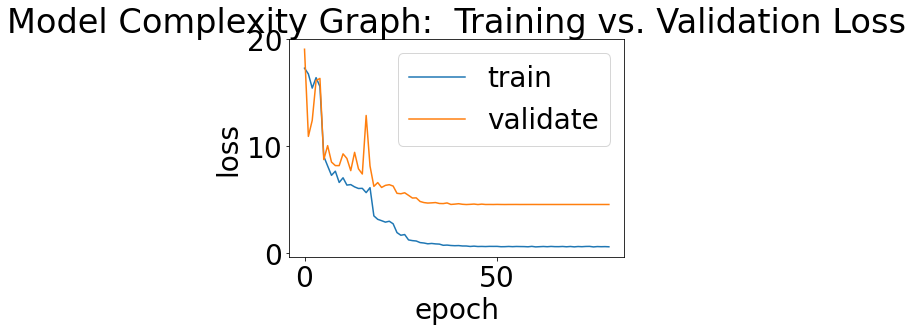

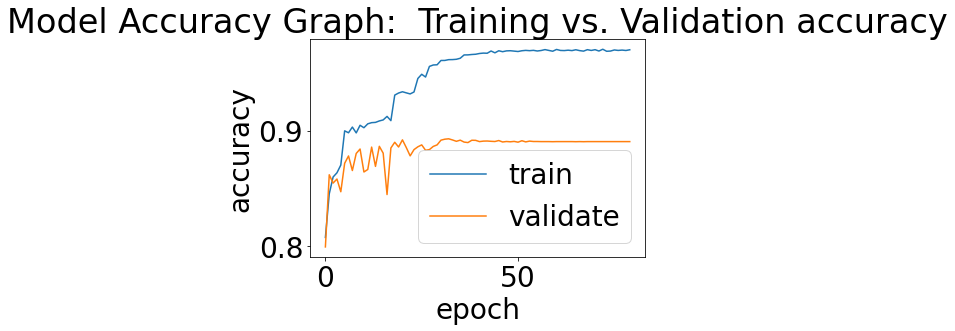

In [ ]:
history1 = np.load("/content/drive/MyDrive/SimpleDNN/all2FAS/history1.npy",allow_pickle=True).item()
plt.figure(1)
plt.plot(history1['loss'])
plt.plot(history1['val_loss'])
plt.title('Model Complexity Graph:  Training vs. Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper right')
plt.show()
plt.figure(2)
plt.plot(history1['accuracy'])
plt.plot(history1['val_accuracy'])
plt.title('Model Accuracy Graph:  Training vs. Validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='lower right')

plt.show()

In [14]:
modelall2 = tf.keras.models.load_model("/content/drive/MyDrive/SimpleDNN/all2FAS/shavemodel")
score = modelall2.evaluate(features_test, labels_test, verbose = 1) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

625/625 [==============================] - 2s 2ms/step - loss: 7.7201 - accuracy: 0.8939
Test loss: 7.720094680786133
Test accuracy: 0.8938999772071838


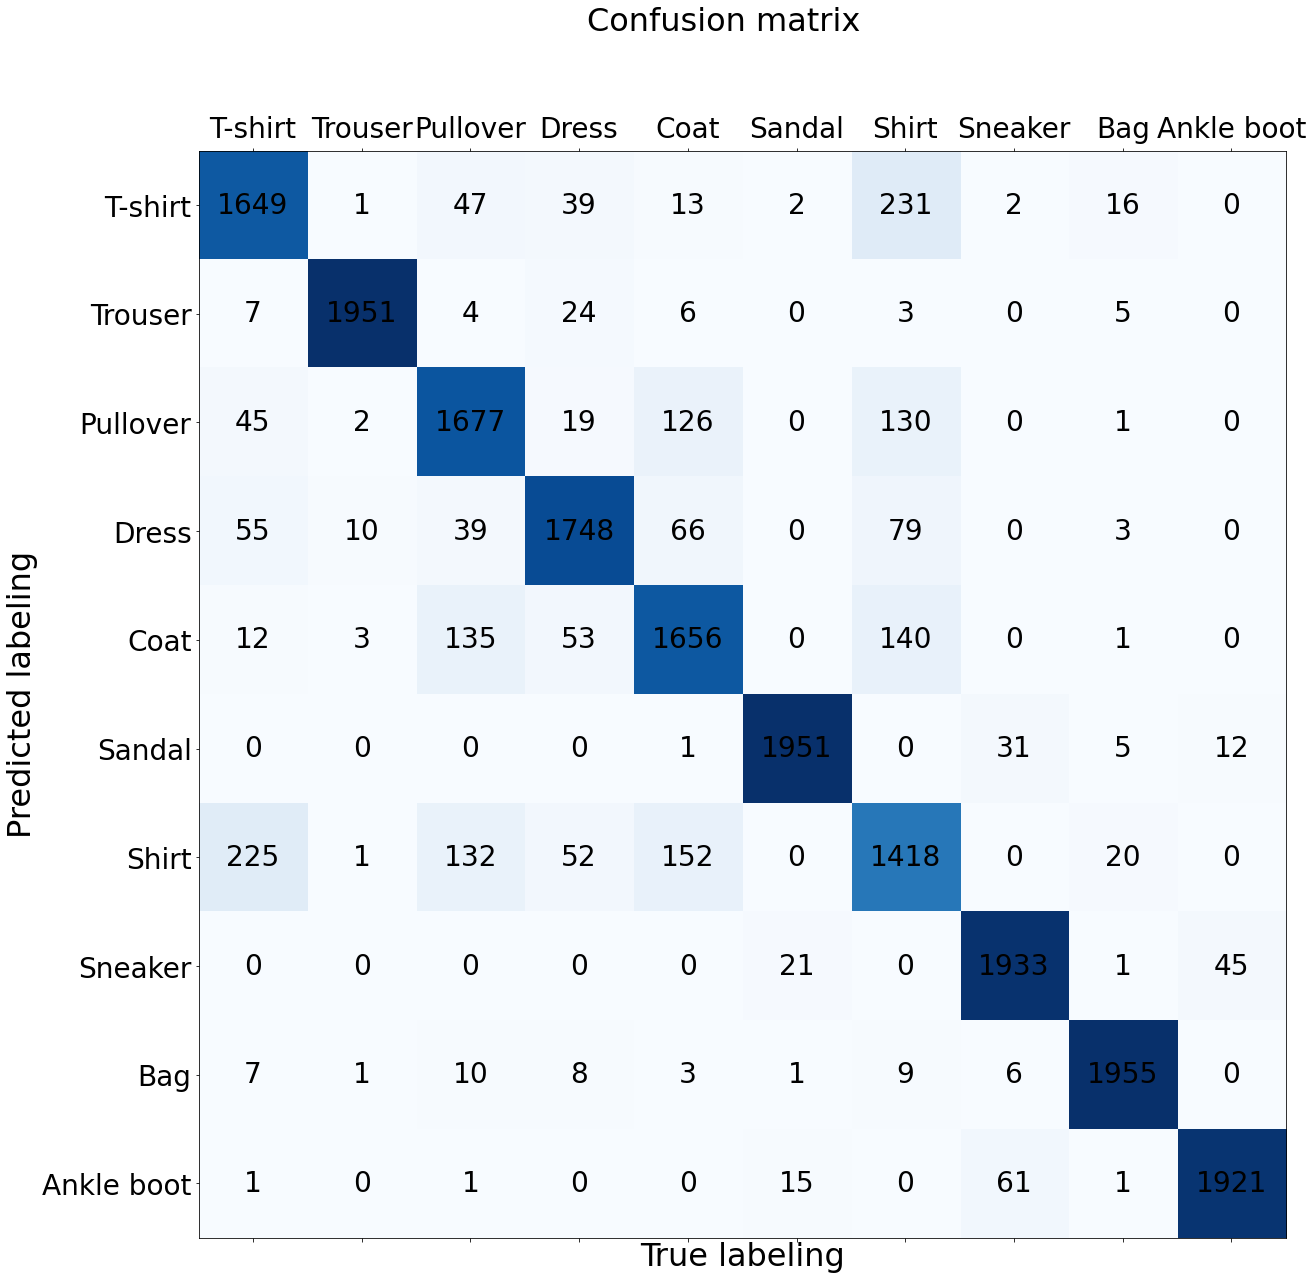

In [ ]:
from sklearn.metrics import confusion_matrix

y_vecs = modelall2.predict(features_test)
y_pred = np.argmax(y_vecs, axis=1)
y_true = labels_test
cm = confusion_matrix(y_true, y_pred)
# print(cm)

# plt.imshow(cm, cmap = 'ocean')
# plt.colorbar

min_val, max_val = 0, 15

# intersection_matrix = np.random.randint(0, 10, size=(max_val, max_val))
fig, ax = plt.subplots(figsize=(20,20))
ax.matshow(cm, cmap=plt.cm.Blues)
# ax.matshow(cm, cmap=plt.cm.magma_r)
ax.xaxis.set_ticklabels(classes); ax.yaxis.set_ticklabels(classes);

for i in range(10):
    for j in range(10):
        c = cm[j,i]
        ax.text(i, j, str(c), va='center', ha='center')


plt.xticks(range(10))
plt.yticks(range(10))
plt.suptitle('Confusion matrix',size = 32)
plt.xlabel('True labeling',size = 32)
plt.ylabel('Predicted labeling',size = 32)
plt.rcParams.update({'font.size': 28})